In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df.shape # Approximately around 2.8 million records and 47 variables

(2845342, 47)

In [2]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

<AxesSubplot:xlabel='Missing Percentage\n', ylabel='Data Metrics\n'>

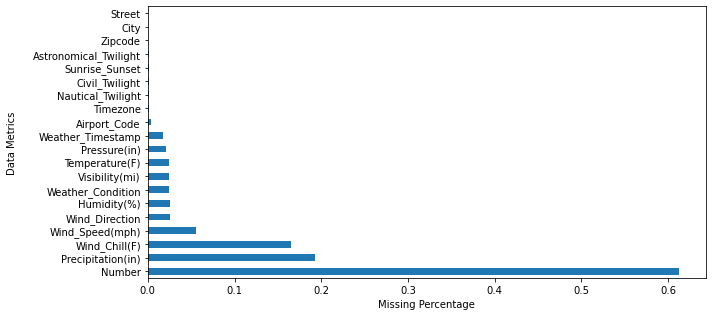

In [5]:
missing_values = df.isnull().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(10,5))
plt.ylabel('Data Metrics\n', fontsize=10)
plt.xlabel('Missing Percentage\n', fontsize=10)
missing_values[missing_values !=0].plot(kind="barh")

In [6]:
df.rename(columns = {'Temperature(F)':'Temperature', 'Visibility(mi)':'Visibility', 'Wind_Speed(mph)': 'Wind_Speed'}, inplace = True)

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Categories of time
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')
df['DayofYear']=df['Start_Time'].dt.dayofyear

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 53 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

### Descriptive Statistical Analysis

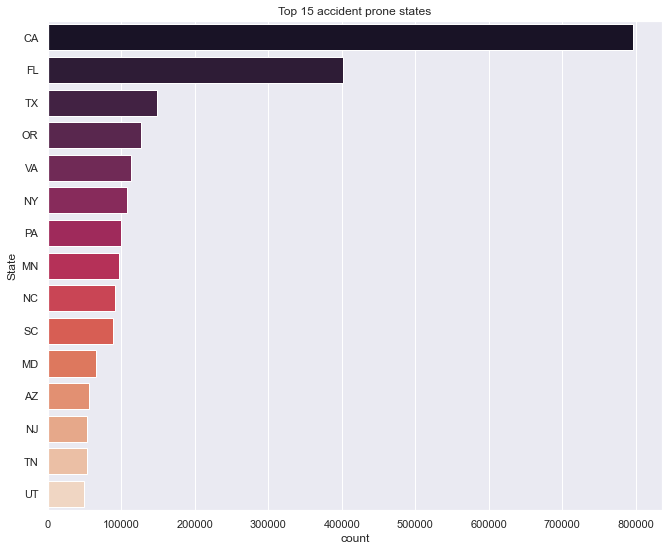

<Figure size 792x648 with 0 Axes>

In [8]:
# 15 most accident prone states 
state_count15=df["State"].value_counts().sort_values(ascending=False)[:15]
sns.set_style('white')
sns.set(rc={'figure.figsize':(11,9)})
sns.barplot(x=state_count15.values,y=state_count15.index, palette='rocket')
plt.xlabel('count')
plt.ylabel('State')
plt.title("Top 15 accident prone states")
plt.show()
plt.savefig('states_plot.jpg', bbox_inches='tight', dpi=150)

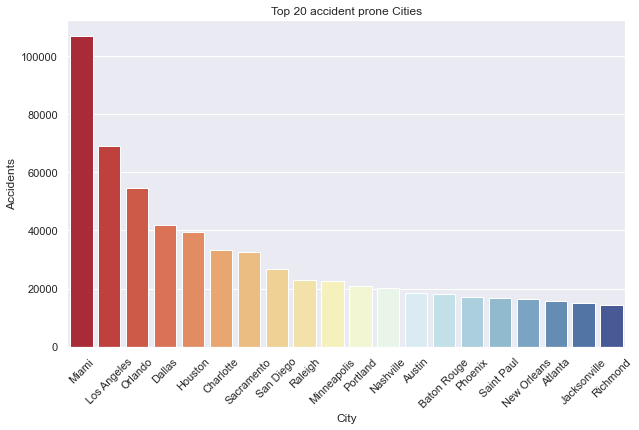

In [9]:
#20 most accident prone cities.
city_count= df.City.value_counts()
fig,axs= plt.subplots(figsize=(10,6))
sns.countplot(x="City",order= city_count.index[:20],data=df, palette='RdYlBu')
plt.ylabel('Accidents')
plt.xticks(rotation=45)
plt.title('Top 20 accident prone Cities')
plt.show()

### Time Based analysis

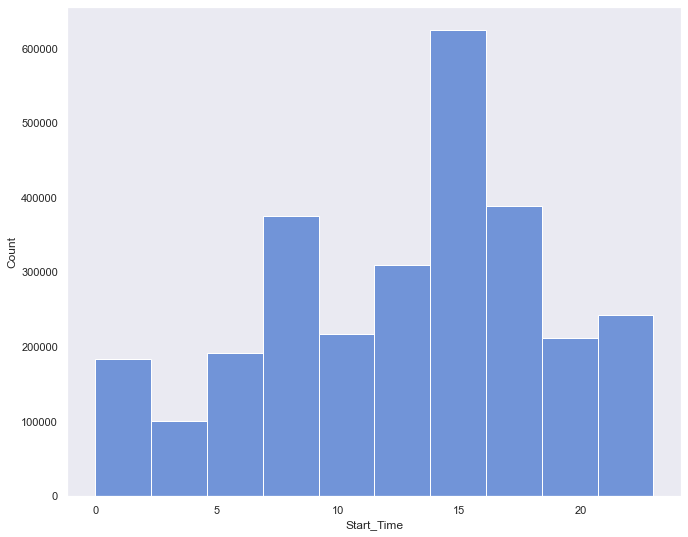

In [10]:
df['Start_Time']= pd.to_datetime(df.Start_Time)
hr = df.Start_Time.dt.hour
sns.set(color_codes=True)
sns.set(style="dark", palette="muted")
sns.histplot(hr,bins=10);

There are two peaks of time - one in the morning in between 6 am to 9 am and another between 3 pm and 6 pm. This is consistent with the assumption that rush hours in the morning and evening could lead to more accident

<AxesSubplot:xlabel='Month', ylabel='Accidents'>

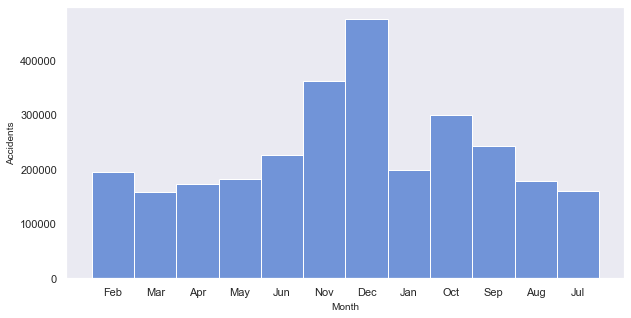

In [11]:
plt.figure(figsize=(10,5))
plt.ylabel('Accidents', fontsize=10)
plt.xlabel('Month', fontsize=10)

# Number of accidents by week
sns.histplot(df.Month, bins=12, kde=False) 

The monthly distribution of accidents, there seems to be a steady upward curve from the second half of the year during the holidays season. 

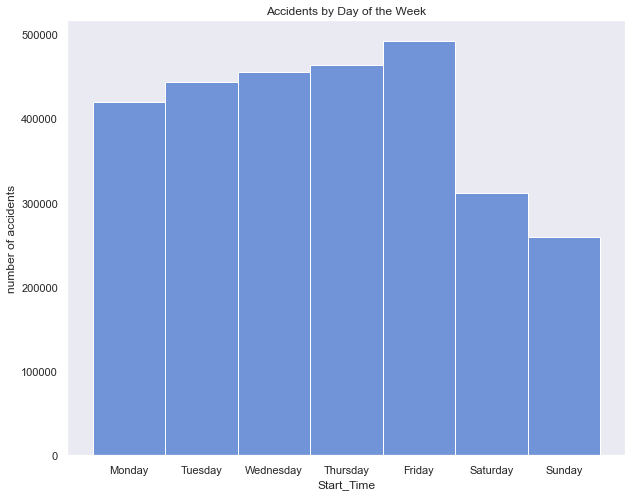

In [12]:
#Accident occurence by day of week
days = df.Start_Time.dt.day_name()
fig, axs = plt.subplots(figsize=(10,8))
sns.histplot(days,kde=False);
plt.ylabel('number of accidents')
plt.title('Accidents by Day of the Week')
plt.show();

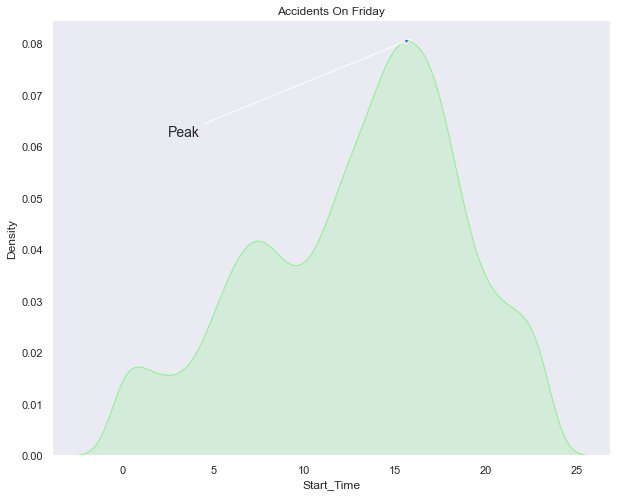

In [13]:
#As we can see friday has the highest percentage of casualities. Lets take a closer look at Friday.
fridays=df[df.Start_Time.dt.dayofweek==4]
fig, ax = plt.subplots(figsize=(10,8))
sns.kdeplot(fridays.Start_Time.dt.hour,fill=True,bw_adjust=2,color='lightgreen',data=fridays);
plt.annotate('Peak',xy=(16,0.081),xytext=(2.5,0.062),arrowprops={'arrowstyle':'-|>'},fontsize= 14)
plt.title('Accidents On Friday')
plt.show()

#### Percentage of accidents that occur during the Day and Night

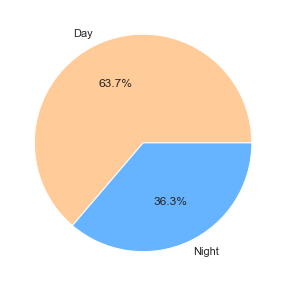

In [14]:
Accident_Day = sum(df.Sunrise_Sunset == "Day")
Accident_Night = sum(df.Sunrise_Sunset == "Night")

total = Accident_Day + Accident_Night
fig = plt.figure(figsize =(8, 5))
plt.pie([Accident_Day, Accident_Night], labels = ['Day', 'Night'], colors=['#ffcc99', '#66b3ff'], autopct='%1.1f%%')
plt.show()

#### Yearly trend of accidents occuring

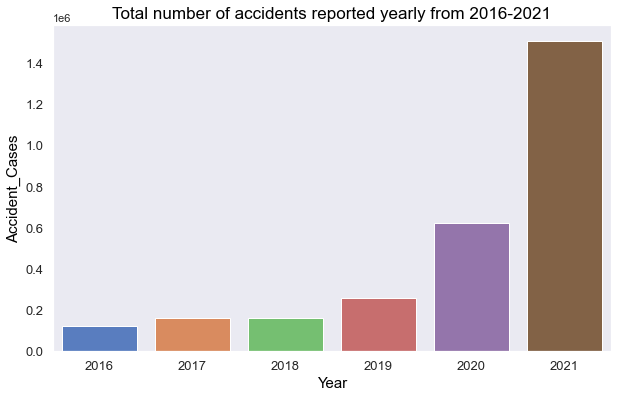

In [15]:
yearly = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={"index": "Year","Start_Time" :"Accident_Cases"})

plt.figure(figsize=(10,6))
plt.title('Total number of accidents reported yearly from 2016-2021',size=17, color='black')
plt.xlabel('Year', fontsize=15, color='black')
plt.ylabel('Accident Cases', fontsize=15, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

t = sns.barplot(x=yearly.Year, y = yearly.Accident_Cases)
plt.show()

Such an increase in 2021 is surprising. The less vehicles on the road and police patrol could be one of the main reasons for this, as it encourages people to travel at higher speeds because there is no traffic. This explains why traffic was unaffected in the first place: there was no traffic to begin with! People were mostly working from home, virtually attending classes, or simply preferring to stay indoors during this time. Because many businesses, restaurents and restaurants were closed.

Text(0.5, 1.0, 'Degree of Severity')

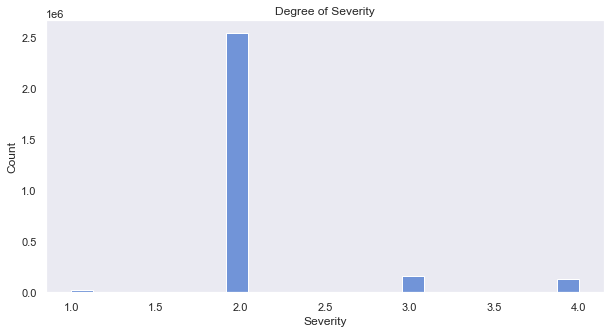

In [16]:
# severity analysis
fig, ax = plt.subplots(figsize = (10,5))
sev = sns.histplot(x="Severity", data=df, palette="YlOrRd")
sev.set_title("Degree of Severity")

### Weather based Analysis

In [17]:
weather_df = df.loc[:,'Temperature':'Weather_Condition']
weather_df['Severity'] = df['Severity']
weather_count = weather_df.Weather_Condition.value_counts()[:25]

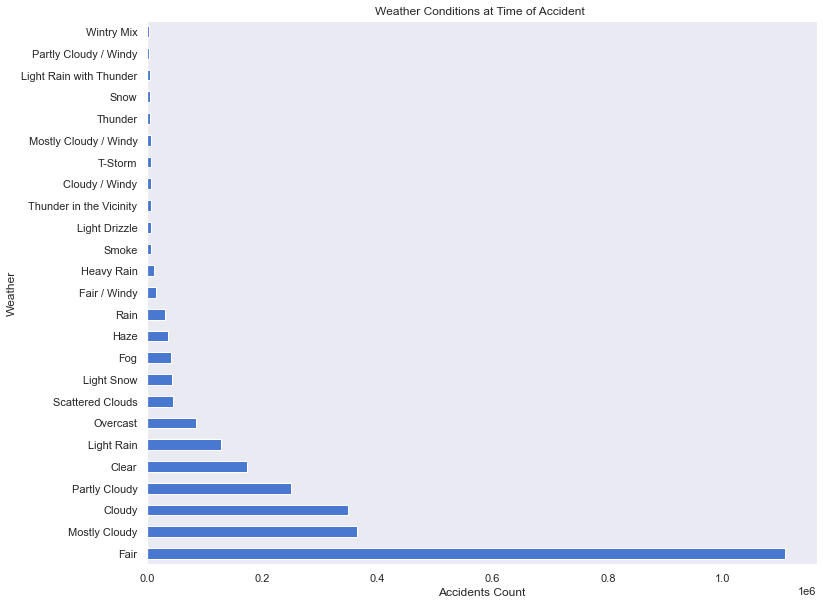

In [18]:
fig, ax = plt.subplots(figsize=(12,10))
weather_count.plot(kind='barh')
ax.set(title = 'Weather Conditions at Time of Accident ',
       xlabel = 'Accidents Count',
       ylabel = 'Weather')
plt.show()

### Correlation

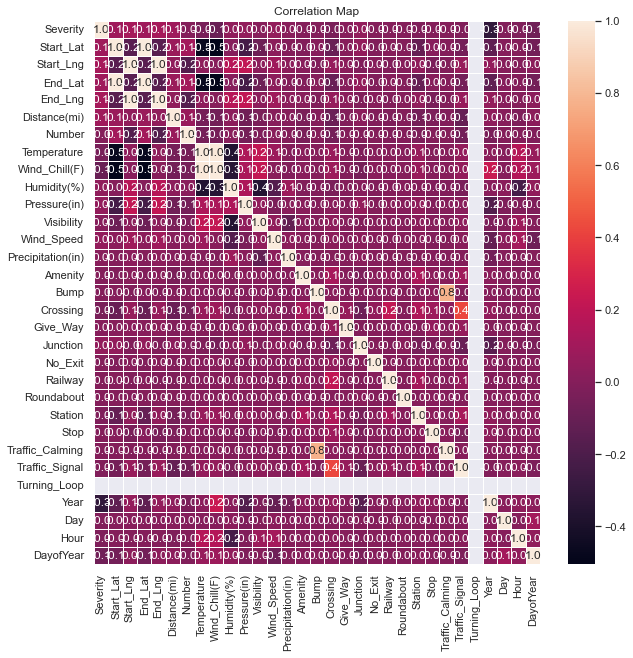

In [19]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot= True, linewidths=0.5, fmt = ".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('CorrelationMap.png')
plt.show()

### Covariance

In [20]:
np.cov(df.Severity,df.Start_Time.dt.dayofweek)
print("Covariance between Severity and Day of Week: ",df.Severity.cov(df.Start_Time.dt.dayofweek))

Covariance between Severity and Day of Week:  -0.004663083253128716


In [21]:
np.cov(df.Severity,df.Start_Time.dt.year)
print("Covariance between Severity and Year: ",df.Severity.cov(df.Start_Time.dt.year))

Covariance between Severity and Year:  -0.21318035509122127


### Pearson's correlation

In [22]:
# finding pearson's correlation between Severity and Hour
p1 = df.loc[:,["Severity","Start_Time"]].corr(method= "pearson")
p2 = df.Severity.cov(df.Start_Time.dt.dayofweek)/(df.Severity.std()*df.Start_Time.dt.dayofweek.std())
print(f'Pearson correlation: {p1}')
print(f'Pearson correlation: {p2}')

Pearson correlation:           Severity
Severity       1.0
Pearson correlation: -0.0052207539330788874


### Cumulative Distribution Function

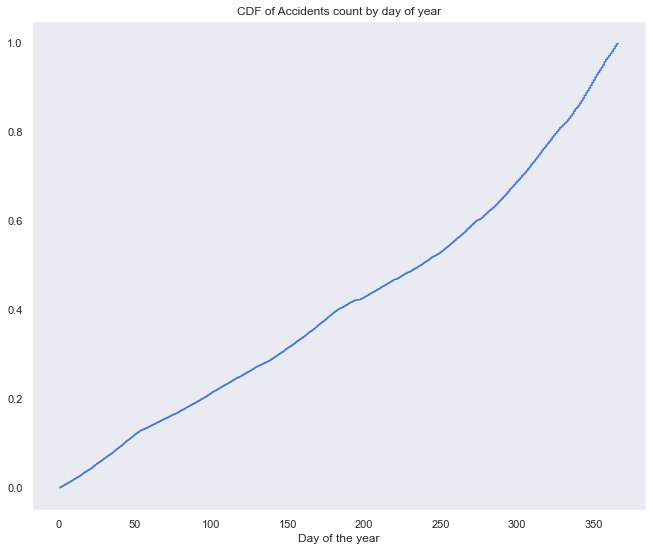

In [23]:
data = df.DayofYear
# sort the data in ascending order
x = np.sort(data)
# get the cdf values of y
y = np.arange(len(x))/float(len(x)-1)

# plotting
plt.xlabel('Day of the year')
plt.title('CDF of Accidents count by day of year')
plt.plot(x, y)

### Probability Mass Function

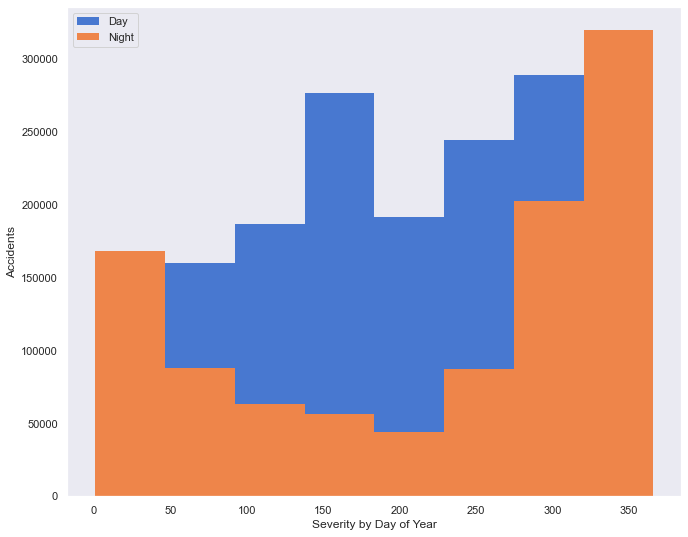

In [24]:
#PMF of Smoothness_Mean for Benign and Malignant Tumors
day = plt.hist(df[df["Sunrise_Sunset"] == 'Day'].DayofYear, bins=8, label = "Day", linewidth=0)
night = plt.hist(df[df["Sunrise_Sunset"] == 'Night'].DayofYear, bins=8, label = 'Night', linewidth=0)

plt.legend()
plt.xlabel("Severity by Day of Year")
plt.ylabel("Accidents")
plt.show()

### Normal distribution

<Figure size 720x576 with 0 Axes>

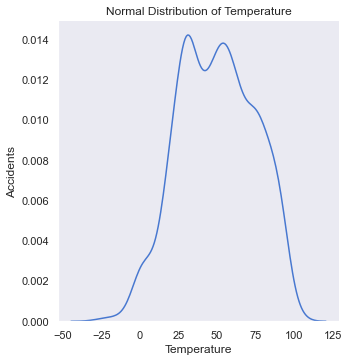

In [37]:
plt.figure(figsize=(10,8))
sns.displot(df['Temperature'], kind="kde")
plt.ylabel("Accidents")
plt.xlabel("Temperature")
plt.title("Normal Distribution of Temperature")
plt.show()

In [26]:
# Convert Start_Time and End_Time into dataframe.
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Categories of time
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
time_d='Time_Duration(min)'
df[time_d]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))


# To see if any outliers
df[time_d][df[time_d]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In order to prevent any infinite or NaN values from disrupting our model, we will implement the use of outliers using median values.

In [27]:
n=3

median = df[time_d].median()
std = df[time_d].std()
outliers = (df[time_d] - median).abs() > std*n

df[outliers] = np.nan

# Include NA 
df[time_d].fillna(median, inplace=True)

In [28]:
features_list = ['ID','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State',
               'Timezone','Temperature',
               'Humidity(%)','Pressure(in)', 
               'Visibility', 'Wind_Direction',
               'Weather_Condition','Amenity',
               'Bump','Crossing','Give_Way',
                'Junction','No_Exit',
               'Railway','Roundabout','Station','Stop','Traffic_Calming',
               'Traffic_Signal',
               'Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

df_rg = df[features_list].copy()
df_rg.isnull().mean()

ID                    0.000558
Severity              0.000558
Start_Lng             0.000558
Start_Lat             0.000558
Distance(mi)          0.000558
Side                  0.000558
City                  0.000606
County                0.000558
State                 0.000558
Timezone              0.001843
Temperature           0.024878
Humidity(%)           0.026220
Pressure(in)          0.021353
Visibility            0.025324
Wind_Direction        0.026458
Weather_Condition     0.025356
Amenity               0.000558
Bump                  0.000558
Crossing              0.000558
Give_Way              0.000558
Junction              0.000558
No_Exit               0.000558
Railway               0.000558
Roundabout            0.000558
Station               0.000558
Stop                  0.000558
Traffic_Calming       0.000558
Traffic_Signal        0.000558
Turning_Loop          0.000558
Sunrise_Sunset        0.001565
Hour                  0.000558
Weekday               0.000558
Time_Dur

In [29]:
df_rg.dropna(subset=df_rg.columns[df_rg.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_rg.shape

(2732152, 33)

In [30]:
state='NE'

# Select the state of Pennsylvania
df_state=df_rg.loc[df_rg.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3153 entries, 12112 to 2845037
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3153 non-null   object 
 1   Severity            3153 non-null   float64
 2   Start_Lng           3153 non-null   float64
 3   Start_Lat           3153 non-null   float64
 4   Distance(mi)        3153 non-null   float64
 5   Side                3153 non-null   object 
 6   City                3153 non-null   object 
 7   County              3153 non-null   object 
 8   Timezone            3153 non-null   object 
 9   Temperature         3153 non-null   float64
 10  Humidity(%)         3153 non-null   float64
 11  Pressure(in)        3153 non-null   float64
 12  Visibility          3153 non-null   float64
 13  Wind_Direction      3153 non-null   object 
 14  Weather_Condition   3153 non-null   object 
 15  Amenity             3153 non-null   object 
 16 

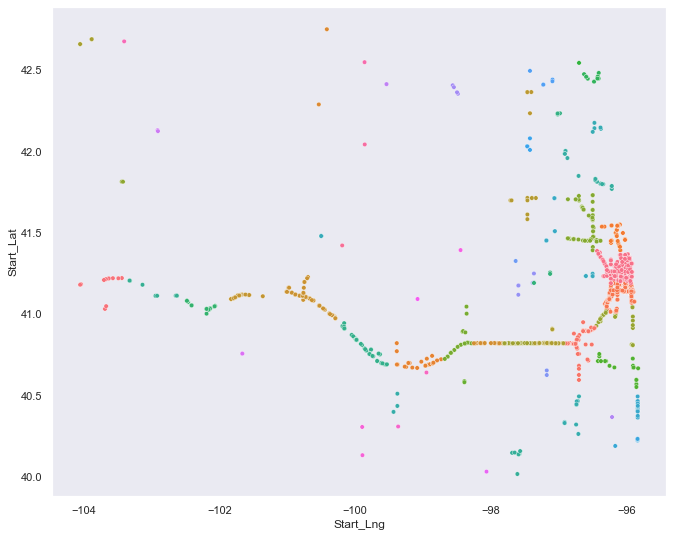

In [31]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=20)
plt.show()

In [32]:
county='Douglas'

# Select the state of Pennsylvania
df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)
df_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 12112 to 2833859
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1700 non-null   object 
 1   Severity            1700 non-null   float64
 2   Start_Lng           1700 non-null   float64
 3   Start_Lat           1700 non-null   float64
 4   Distance(mi)        1700 non-null   float64
 5   Side                1700 non-null   object 
 6   City                1700 non-null   object 
 7   Timezone            1700 non-null   object 
 8   Temperature         1700 non-null   float64
 9   Humidity(%)         1700 non-null   float64
 10  Pressure(in)        1700 non-null   float64
 11  Visibility          1700 non-null   float64
 12  Wind_Direction      1700 non-null   object 
 13  Weather_Condition   1700 non-null   object 
 14  Amenity             1700 non-null   object 
 15  Bump                1700 non-null   object 
 16 

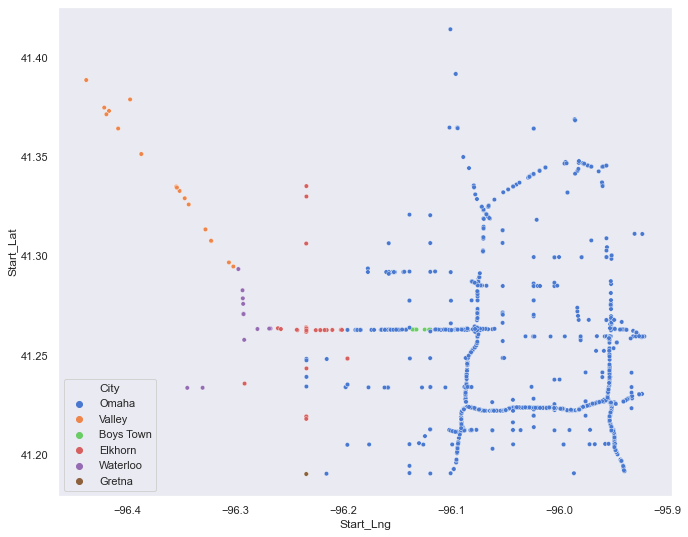

In [33]:
# Map of accidents, color code by city

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_county, hue='City', legend=True, s=20)
plt.show()

In [34]:
# Generate dummies for categorical data
df_county_dummy = pd.get_dummies(df_county,drop_first=True)

# Export data
# df_county_dummy.to_csv('./US_Accidents_May19_{}_dummy.csv'.format(state),index=False)

df_county_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 12112 to 2833859
Columns: 1794 entries, Severity to Weekday_Wed
dtypes: float64(10), uint8(1784)
memory usage: 3.0 MB


In [35]:
# Assign the data
df = df_county_dummy

# Set the target for the prediction
target = 'Severity'


# Create arrays for the features and the response variable

# set X and y
Y = df[target]
X = df.drop(target, axis=1)



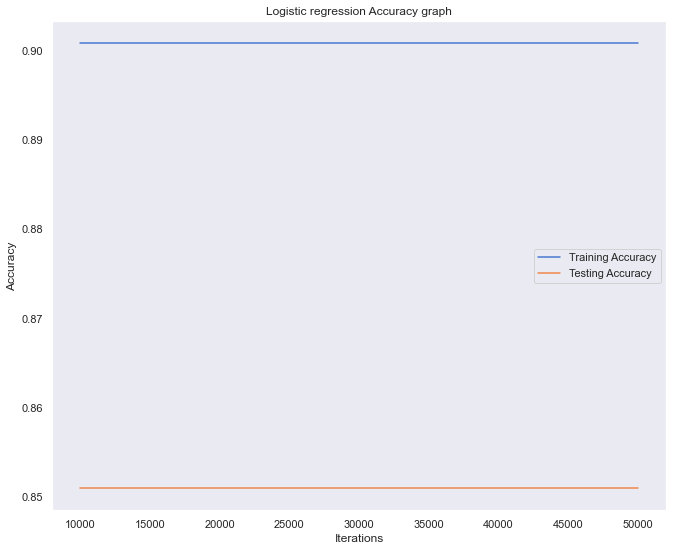

In [36]:
# Split the data set into training and testing data sets #random_state=21, stratify=Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

iters = [10000, 15000, 20000, 25000, 30000, 40000, 50000]
test_score = []
train_score = []

for i in iters:
    lr = LogisticRegression(max_iter=i)
    lr.fit(X_train, Y_train)
    test_score.append(lr.score(X_test, Y_test))
    train_score.append(lr.score(X_train, Y_train))

plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Logistic regression Accuracy graph")
plt.plot(iters, train_score, label= 'Training Accuracy')
plt.plot(iters, test_score, label= 'Testing Accuracy')
plt.legend()